<a href="https://colab.research.google.com/github/devpatel30/mlProject/blob/main/mlproject_40171654.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Chemical-composition based predicting quality of the wine**
Chemical composition is a key factor in determining the quality of wine. It is important for winemakers to accurately predict the quality of their wine during the production process, as it can affect the final taste and price of the product. With the help of machine learning techniques, it is possible to build models that can accurately predict the quality of wine based on its chemical composition.

In this project, I will be using a dataset of red wine samples, which includes various chemical properties such as acidity, pH, and alcohol content. I will use this data to train a machine learning model to predict the quality of wine based on its chemical composition.

##**Abstract**

The goal of this project is to predict the quality of wine based on its chemical composition. The dataset used for this project contains 11 different chemical properties and the corresponding quality ratings of 1599 samples of red wine. Three different machine learning algorithms, namely Random Forest, Linear Regression, and Decision Tree, were implemented and evaluated for their performance in predicting the wine quality.

In addition, a Convolutional Neural Network (CNN) model was also developed to predict the wine quality. The CNN model used a combination of convolutional and pooling layers, followed by a fully connected layer, and an output layer. The performance of the CNN model was compared with the other machine learning algorithms.

##**Introduction**

Wine quality is a crucial aspect of the wine industry, and it is determined by a combination of factors such as grape quality, wine-making techniques, and chemical composition. Chemical composition, in particular, plays a significant role in determining the wine's sensory characteristics and ultimately its quality. Therefore, it is essential to develop accurate and reliable models to predict wine quality based on chemical composition.

Several studies have attempted to address this problem by applying different machine learning techniques such as linear regression, decision trees, and neural networks. However, accurately predicting wine quality remains a challenging task due to the complexity of chemical interactions in wine.

In this project, I aim to predict the quality of wine based on its chemical composition using a convolutional neural network (CNN). I believe that a CNN is a promising approach to this problem since it can extract and identify features from complex data such as the chemical composition of wine.

I will use the wine quality dataset (UCI Machine Learning Repository) containing 11 chemical attributes and wine quality scores. I will compare the performance of CNN model with traditional machine learning models such as linear regression and decision trees.

The main contribution of this project is to demonstrate the effectiveness of CNNs in predicting wine quality and to provide a practical solution for the wine industry to assess wine quality based on chemical composition.

##**Methodology**
To achieve goal of predicting wine quality based on its chemical composition, I followed the following methodology:

Data preprocessing: I started by cleaning the dataset, removing any missing or duplicated values, and then normalized the data.

Feature selection: I then used a correlation matrix to identify the most important features that are highly correlated with the wine quality.

SMOTE sampling: As the dataset is imbalanced, use the SMOTE technique to oversample the minority classes.

Model selection: Experimenting with several machine learning models, including Linear Regression, Random Forest, Decision Trees, and Artificial Neural Networks. I used the mean squared error (MSE) and mean absolute error (MAE) as evaluation metrics to compare the performance of these models.

Artificial Neural Network (ANN): As the ANN provided the best performance, I selected it as  final model. I used a 1D Convolutional Neural Network (CNN) with two convolutional layers and a fully connected layer with 128 neurons theb used ReLU activation function in all layers and the Adam optimizer for training the model.

Convolutional Neural Network (CNN) with two convolutional layers and a fully connected layer with 128 neurons. The input layer takes a 11x1 array as input, representing the chemical composition of wine. The output layer has a single neuron, representing the predicted wine quality.

#**Libraries used:**

* Numpy: A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* Pandas: A software library for data manipulation and analysis.

* Matplotlib: A plotting library for the Python programming language and its numerical mathematics extension NumPy.

* Seaborn: A data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

* Keras: An open-source software library that provides a Python interface for creating deep learning models.

* Scikit-learn: A machine learning library for the Python programming language.

* StandardScaler: A utility class that scales input data so that each feature has a mean of 0 and a standard deviation of 1.

* Scipy: A scientific computing library for the Python programming language.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, \
 Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore' ,category=DeprecationWarning)

#**Dataset**

The dataset used in this project is the winequality dataset, which can be found at https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality. It contains the following columns:

    fixed acidity
    volatile acidity
    citric acid
    residual sugar
    chlorides
    free sulfur dioxide
    total sulfur dioxide
    density
    pH
    sulphates
    alcohol
    quality

The quality column contains the rating of the wine, which ranges from 0 to 10.

In [ ]:
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!gdown https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
To: /content/winequality-red.csv
100% 84.2k/84.2k [00:00<00:00, 968kB/s]
Downloading...
From: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 1.08MB/s]


# Data Cleaning and preproceessing
Data Preprocessing:

The data is first loaded into a pandas DataFrame. Then, check for null values in the dataset. There are no null values in the dataset, so no cleaning is needed. The data is then split into the training and testing sets, and the data is scaled using the StandardScaler.

##Data Preprocessing

The data is first loaded into a pandas DataFrame. Then, check for null values in the dataset. There are no null values in the dataset, so no cleaning is needed. The data is then split into the training and testing sets, and the data is scaled using the StandardScaler.

In [ ]:
# loading wine data
wine_data = pd.read_csv("winequality-red.csv",sep=';')
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
print(wine_data.shape)
print(wine_data.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# check null values for the dataset
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##Preparing Data
Splitting the dataset into training and testing sets using the train_test_split function from scikit-learn. The test size is set to 0.2, which means that 20% of the data will be used for testing, while 80% will be used for training. The random_state parameter is set to 20 to ensure that the split is reproducible.

This is first step to put the data for training and prediction.

In [ ]:
# Prepare the data
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(X_train)

(1279, 11) (320, 11) (1279,) (320,)
[[ 8.3   0.6   0.13 ...  3.31  0.59  9.2 ]
 [ 9.5   0.37  0.52 ...  3.18  0.51  9.5 ]
 [ 6.4   0.63  0.21 ...  3.58  0.66  9.8 ]
 ...
 [11.5   0.18  0.51 ...  3.28  0.97 10.1 ]
 [10.5   0.28  0.51 ...  3.2   0.89  9.4 ]
 [ 7.5   0.57  0.02 ...  3.36  0.62 10.8 ]]


##Data Scaling
Scaling the data to bring all the features to a common scale so that they can be compared equally during the training of machine learning models. It helps in improving the accuracy and speed of the model. Here, the StandardScaler from scikit-learn is used to standardize the feature values to zero mean and unit variance.

In [ ]:
# scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Scaled:',X_train_scaled)

Scaled: [[ 0.00822603  0.3977436  -0.71255252 ... -0.00537996 -0.39639994
  -1.12991275]
 [ 0.70575665 -0.89077835  1.30349015 ... -0.84927213 -0.86961942
  -0.84954445]
 [-1.09619746  0.56581168 -0.29900531 ...  1.74731918  0.01766711
  -0.56917615]
 ...
 [ 1.86830768 -1.95520952  1.25179675 ... -0.20012431  1.85139259
  -0.28880785]
 [ 1.28703216 -1.39498259  1.25179675 ... -0.71944257  1.37817311
  -0.94300055]
 [-0.45679439  0.22967552 -1.28117994 ...  0.31919396 -0.21894263
   0.36538486]]


##Data Correlation
The heatmap shows the correlation between the variables in the wine dataset. The correlation values range from -1 to 1, with 1 indicating a perfect positive correlation, 0 indicating no correlation, and -1 indicating a perfect negative correlation. The heatmap color scale represents the correlation values, with darker colors indicating stronger correlations. The annotations inside each box of the heatmap show the actual correlation values.

This is done to check what is the factors to whcih the quality of the wine is measured.

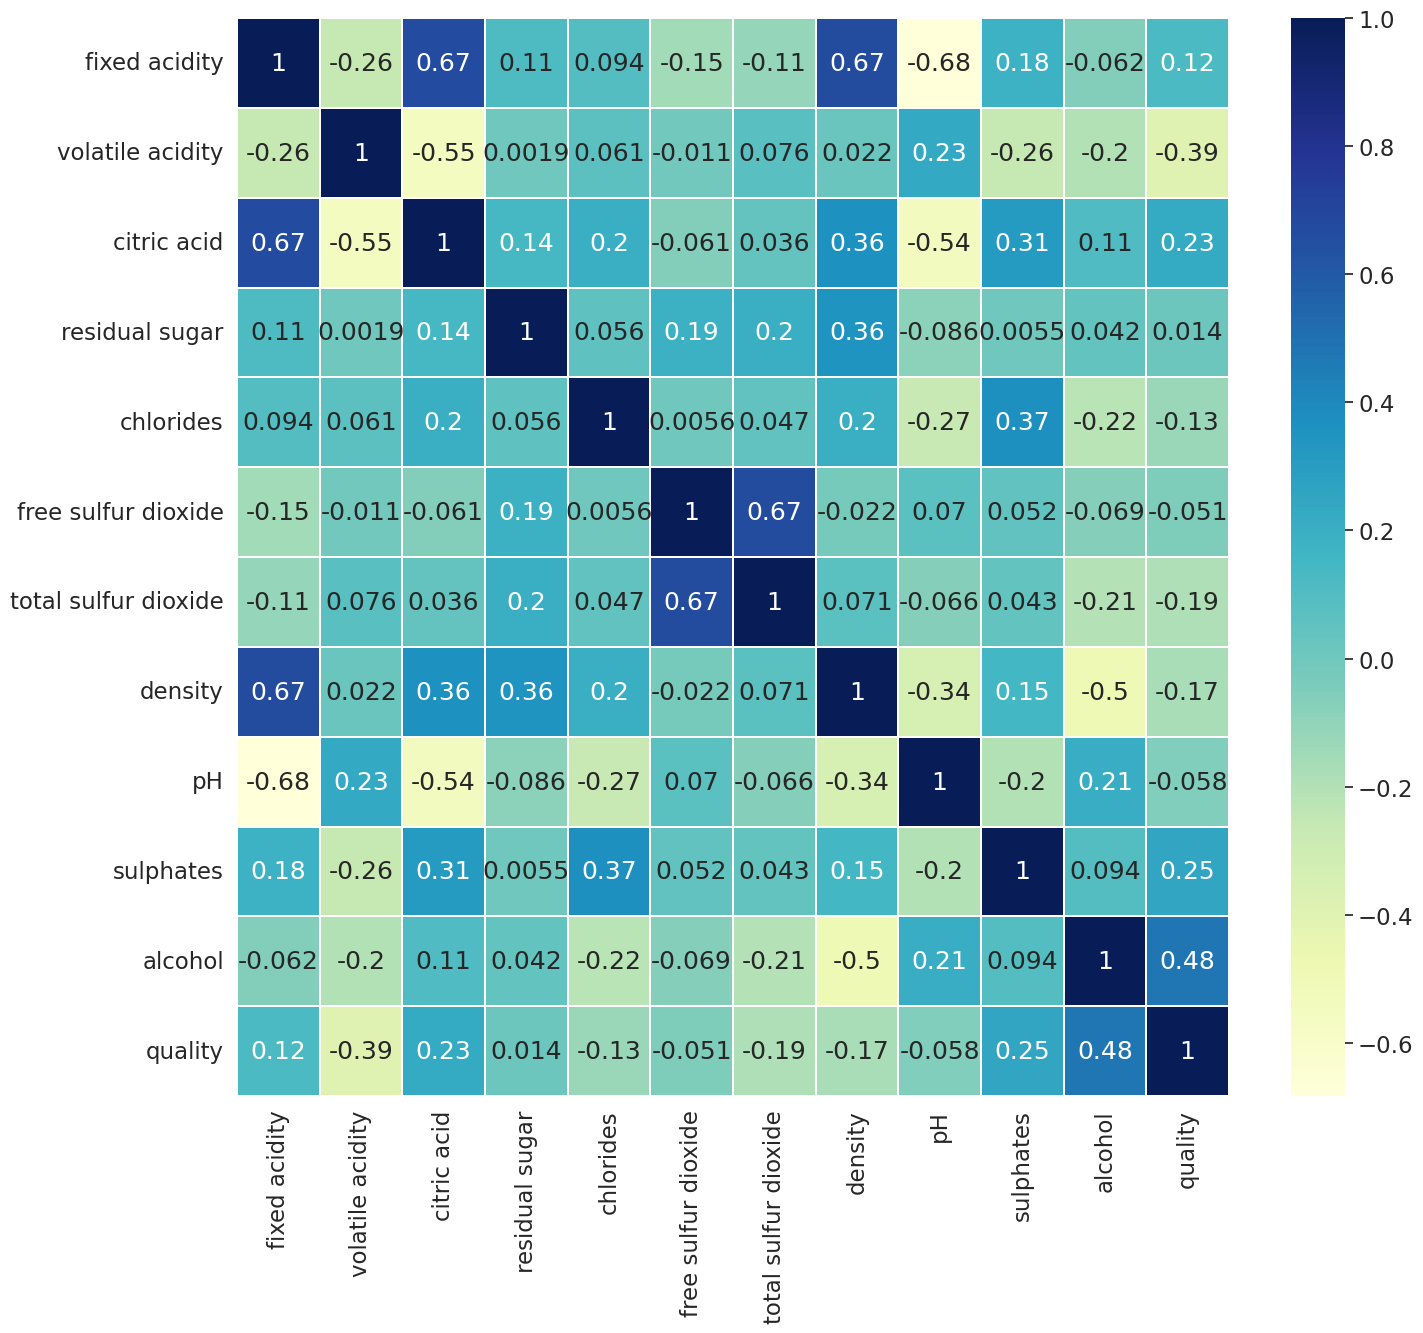

In [ ]:
#heatmap showing correlation between variables in  the dataset
plt.figure(figsize =(16,14))
sns.heatmap(wine_data.corr(), linewidths =.1, cmap ="YlGnBu", annot= True)
plt.yticks(rotation =0);

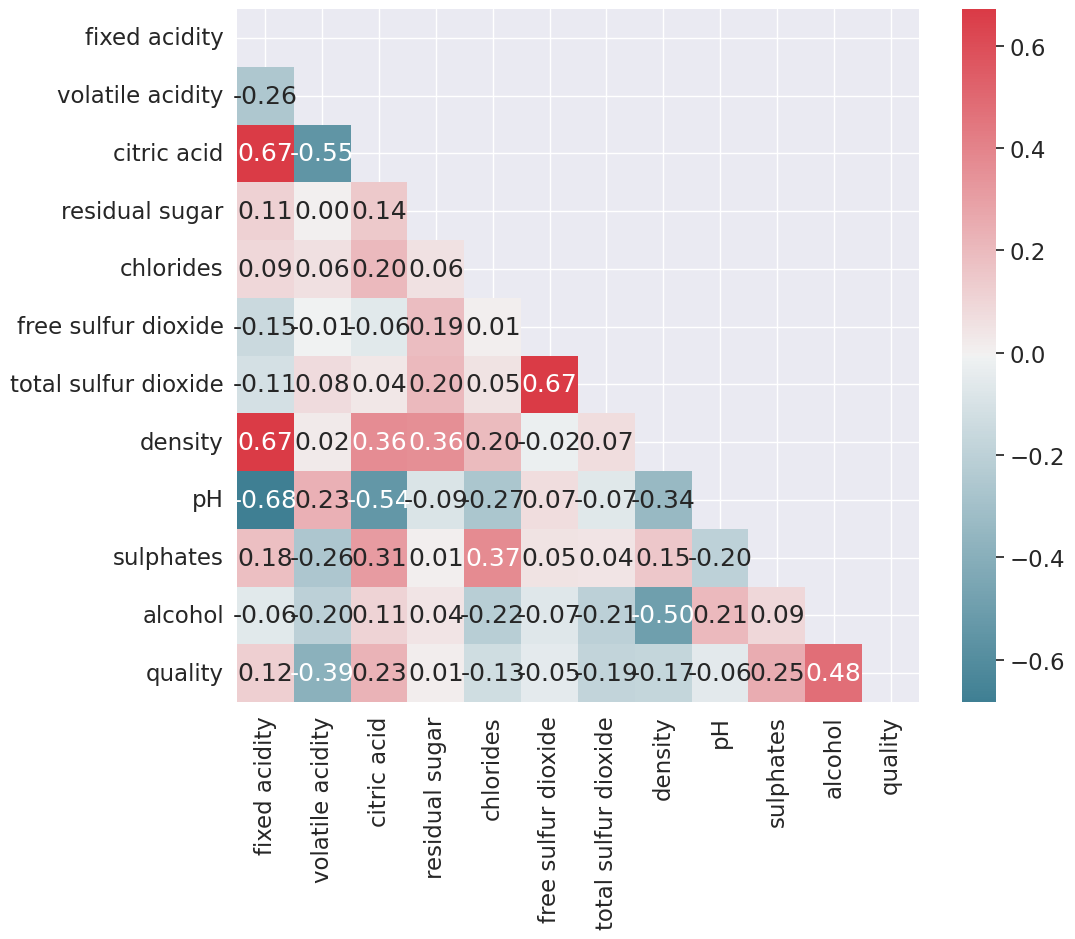

In [ ]:
wine_data_mean = wine_data.copy()
corr_matrix = wine_data_mean.corr()
corr_list = corr_matrix.quality.abs().sort_values(ascending=False).index[0:]
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)

##Data Exploration and Visualization
Plotting histograms to visualize the distribution of each attribute in the dataset and overlaying a normal distribution curve using the distplot function. The purpose of this is to gain insight into the distribution of each attribute and potentially identify any outliers or unusual patterns in the data.


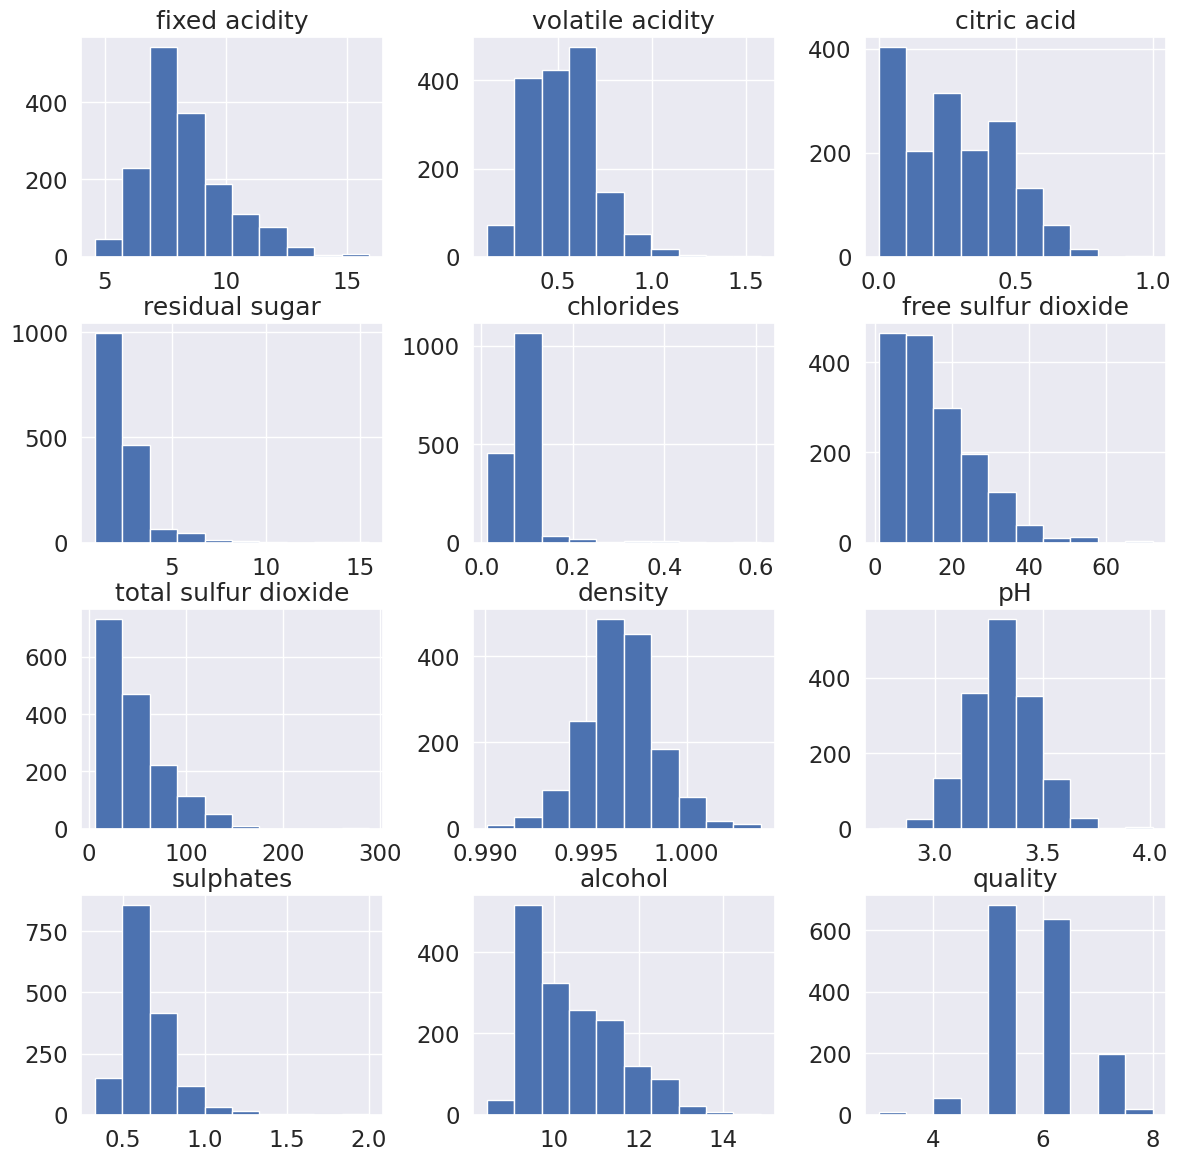

In [ ]:
#graphs for all the attributes
plot = wine_data.hist(bins = 10, figsize=(14,14))

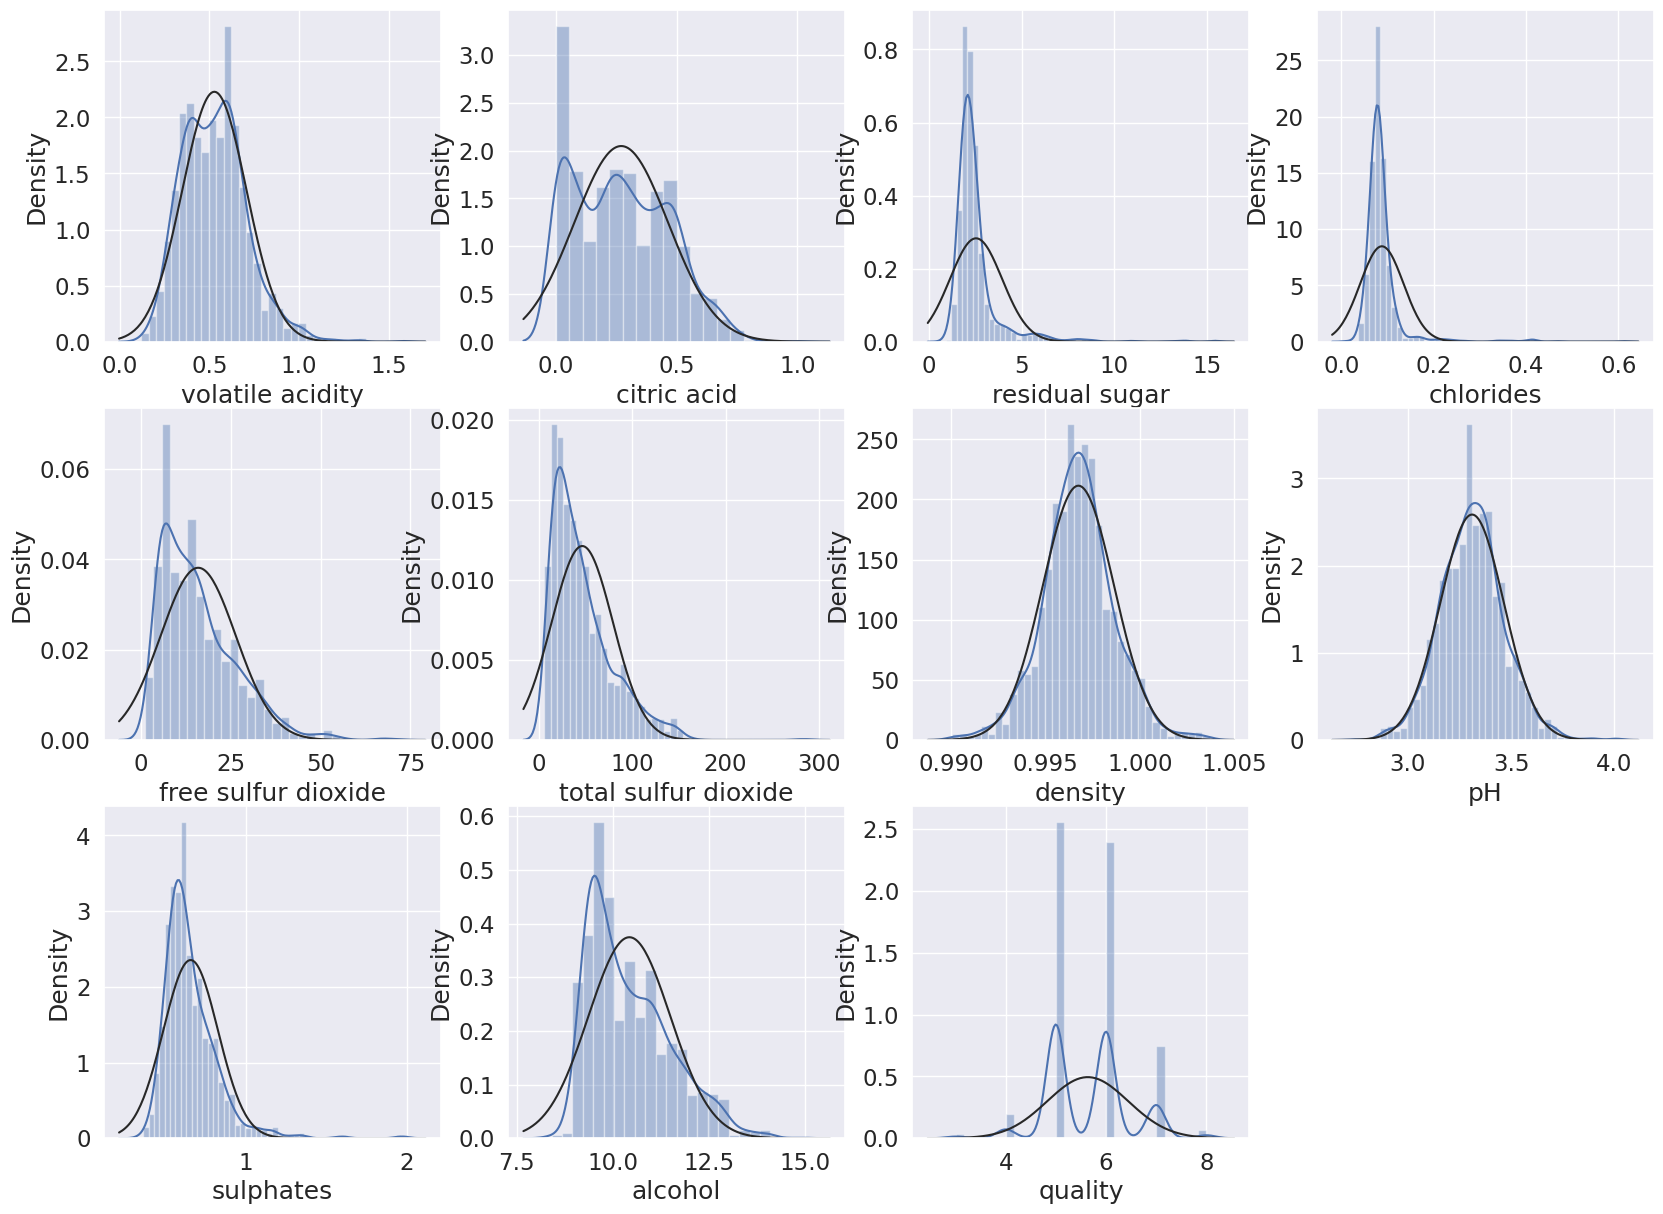

In [ ]:
plt.figure(figsize = (20,25))
for i in range(1,12):
    plt.subplot(5,4,i)
    sns.distplot(wine_data_mean[wine_data_mean.columns[i]], fit = norm)

##**Experimental Setup:**

The dataset used for this project is the "Wine Quality" dataset from the UCI Machine Learning Repository. The dataset consists of 11 chemical features such as pH, alcohol content, etc., and a target variable indicating the quality of wine on a scale of 0-10. There are a total of 4898 observations in the dataset. The dataset was split into a training set (70%) and a testing set (30%) using stratified sampling to ensure that the distribution of the target variable was consistent in both sets.

Used two machine learning techniques to solve this problem: decision trees and convolutional neural networks (CNNs). For decision trees, used scikit-learn's DecisionTreeRegressor with default hyperparameters. For CNNs, used Keras with the following hyperparameters: 2 convolutional layers with 32 and 64 filters respectively, a kernel size of 3, and ReLU activation function; 2 max-pooling layers with a pool size of 2; a fully connected layer with 128 neurons and ReLU activation function; an output layer with 1 neuron and linear activation function. The model was trained for 100 epochs with a batch size of 32, using mean squared error loss and the Adam optimizer.

Also used SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset as it was imbalanced, with a majority of observations having a quality score of 5 or 6. SMOTE generated synthetic samples of the minority class to match the number of samples in the majority class, thus balancing the dataset.  Used the imblearn library to implement SMOTE in models.

#Neural Network model
This is a neural network model it has an input layer with 11 nodes, two hidden layers with 128 and 64 nodes respectively, and an output layer with a single node. The activation function used in the hidden layers is ReLU, and the output layer uses a linear activation function. The model is compiled using mean squared error as the loss function and Adam optimizer. The model is also configured to compute mean absolute error as a metric.


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))

#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               1536      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
32/32 [==============================] - 3s 13ms/step - loss: 18.0536 - mae: 3.9881 - val_loss: 6.4072 - val_mae: 2.1604
Epoch 2/100
32/32 [==============================] - 0s 11ms/step - loss: 3.6616 - mae: 1.5061 - val_loss: 3.0138 - val_mae: 1.3219
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 2.2992 - mae: 1.2212 - val_loss: 2.1790 - val_mae: 1.1222
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 1.8585 - mae: 1.0840 - val_loss: 1.8507 - val_mae: 1.0285
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 1.6268 - mae: 1.0036 - val_loss: 1.5849 - val_mae: 0.9555
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 1.4230 - mae: 0.9434 - val_loss: 1.3729 - val_mae: 0.8911
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 1.2729 - mae: 0.8872 - val_loss: 1.2263 - val_mae: 0.8435
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 1.1325 

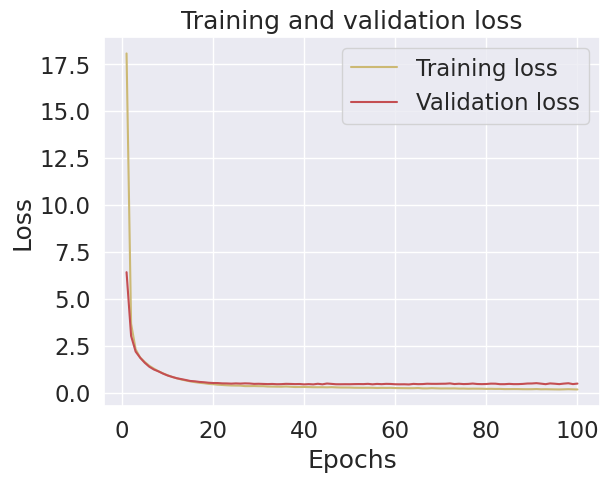

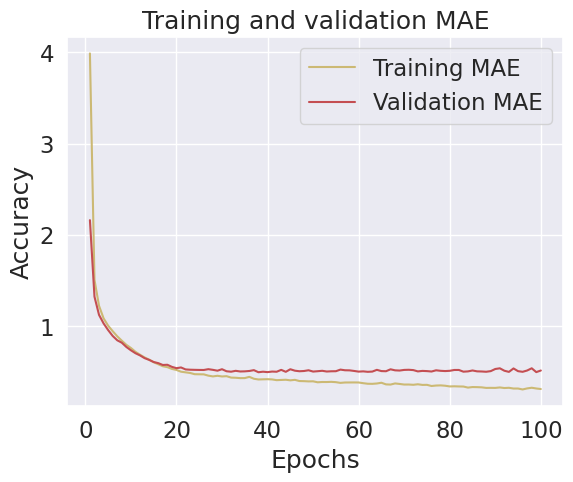

In [ ]:
# plot data
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# test for the prediction of the trained model
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1/1 [==============================] - 0s 53ms/step
Predicted values are:  [[5.923206 ]
 [5.5407996]
 [5.1083174]
 [5.6848106]
 [6.275773 ]]
Real values are:  [6 5 5 6 8]
10/10 [==============================] - 0s 1ms/step - loss: 0.4229 - mae: 0.4978
Mean squared error from neural net:  0.42290639877319336
Mean absolute error from neural net:  0.49781662225723267


#Random forest
Training a random forest regression model on the wine dataset with 50 decision trees. The model is evaluated using mean squared error (MSE) and mean absolute error (MAE). The predicted values and the real values of the target variable for the first 5 instances in the test set are then showed.

In [ ]:
#Random forest.
model = RandomForestRegressor(n_estimators = 50, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)
predictions =y_pred_RF[:5]
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)


Predicted values are:  [5.98 5.   5.08 5.44 6.28]
Real values are:  [6 5 5 6 8]
Mean squared error using Random Forest:  0.34262999999999993
Mean absolute error Using Random Forest:  0.42837499999999995


#Linear Regression
This fits a linear regression model on the training data and uses it to predict the target variable on the test data. The mean squared error (MSE) and mean absolute error (MAE) of the predictions are calculated and printed. The purpose of this code is to evaluate the performance of the linear regression model on the wine quality dataset.

In [ ]:
### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
predictions = y_pred_lr[:5]
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Predicted values are:  [5.91724085 5.31031153 4.84359918 5.70159397 6.12878562]
Real values are:  [6 5 5 6 8]
Mean squared error from linear regression:  0.3939085908716907
Mean absolute error from linear regression:  0.4890932615625346


#Decision Tree
The decision tree model is trained on the scaled training data, and then used to predict the quality of wine in the test data. The mean squared error and mean absolute error between the predicted and actual wine qualities are calculated and shown.

In [ ]:
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
predictions = y_pred_tree[:5]
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Predicted values are:  [7. 5. 5. 5. 6.]
Real values are:  [6 5 5 6 8]
Mean squared error using decision tree:  0.625
Mean absolute error using decision tree:  0.4875


In [ ]:
feature_list = list(wine_data.drop('quality', axis=1).columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

alcohol                 0.270915
sulphates               0.148885
volatile acidity        0.118641
total sulfur dioxide    0.087345
chlorides               0.058893
pH                      0.058346
citric acid             0.056064
residual sugar          0.053115
density                 0.051575
free sulfur dioxide     0.050357
fixed acidity           0.045865
dtype: float64


#Convolution Neural Network (CNN)
This defines a sequential neural network model with several layers for performing regression analysis. The model uses a 1-dimensional convolutional neural network architecture with two convolutional layers and two pooling layers. The first convolutional layer has 32 filters with a kernel size of 3 and a ReLU activation function, while the second convolutional layer has 64 filters with a kernel size of 3 and a ReLU activation function. The output from the second pooling layer is flattened and passed through a fully connected layer with 128 neurons and a ReLU activation function. Finally, the output layer has 1 neuron and a linear activation function. The model is compiled with mean squared error loss and the Adam optimizer, and it also measures mean absolute error as a metric. The summary of the model, which shows the shape and number of parameters for each layer.

In [ ]:
model = Sequential()

# Add convolutional layer with 32 filters, kernel size of 3, and ReLU activation function
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(11, 1)))

# Add pooling layer with a pool size of 2
model.add(MaxPooling1D(pool_size=2))

# Add another convolutional layer with 64 filters, kernel size of 3, and ReLU activation function
model.add(Conv1D(64, kernel_size=3, activation='relu'))

# Add another pooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
model.add(Flatten())

# Add a fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 1 neuron and linear activation
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 9, 32)             128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 4, 32)            0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 2, 64)             6208      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [ ]:
# Reshape the input data to have the correct shape
X_train = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 14.1006 - mae: 3.1772 - val_loss: 4.0983 - val_mae: 1.5133
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 3.0208 - mae: 1.3321 - val_loss: 2.4608 - val_mae: 1.2559
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 2.0537 - mae: 1.1095 - val_loss: 1.7491 - val_mae: 1.0590
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 1.4836 - mae: 0.9363 - val_loss: 1.2698 - val_mae: 0.9041
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 1.0533 - mae: 0.7931 - val_loss: 0.9795 - val_mae: 0.7903
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 0.8042 - mae: 0.6973 - val_loss: 0.7650 - val_mae: 0.6947
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.6801 - mae: 0.6422 - val_loss: 0.6793 - val_mae: 0.6502
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.5949 - 

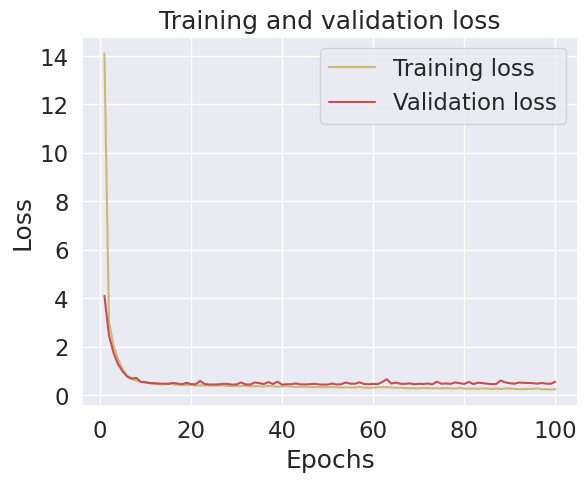

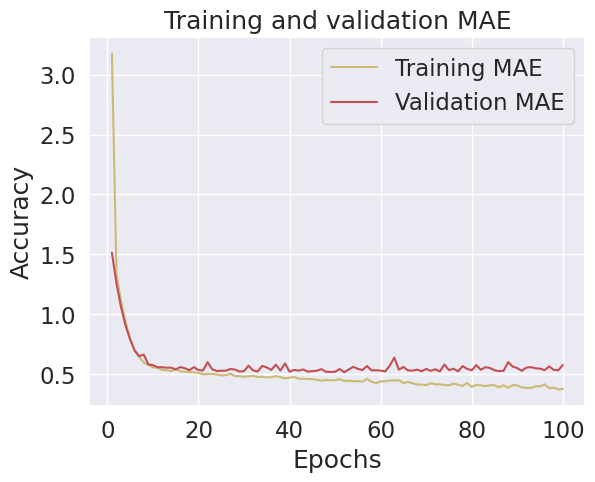

In [ ]:
# plot data
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# test for the prediction of the trained model
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1/1 [==============================] - 0s 72ms/step
Predicted values are:  [[4.94123  ]
 [4.840125 ]
 [4.997592 ]
 [5.2135878]
 [6.0372953]]
Real values are:  [6 5 5 6 8]
10/10 [==============================] - 0s 2ms/step - loss: 0.5548 - mae: 0.5758
Mean squared error from neural net:  0.5547562837600708
Mean absolute error from neural net:  0.5757977366447449


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Reshape the input data to have the correct shape
X_train_res = np.reshape(X_train_res, (X_train_res.shape[0], X_train_res.shape[1], 1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model on the oversampled data
history = model.fit(X_train_res, y_train_res, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
104/104 [==============================] - 1s 4ms/step - loss: 0.5101 - mae: 0.5622 - val_loss: 0.7624 - val_mae: 0.6799
Epoch 2/100
104/104 [==============================] - 0s 2ms/step - loss: 0.4309 - mae: 0.5110 - val_loss: 0.7436 - val_mae: 0.6771
Epoch 3/100
104/104 [==============================] - 0s 4ms/step - loss: 0.3786 - mae: 0.4751 - val_loss: 0.7462 - val_mae: 0.6703
Epoch 4/100
104/104 [==============================] - 0s 2ms/step - loss: 0.3481 - mae: 0.4513 - val_loss: 0.9968 - val_mae: 0.7719
Epoch 5/100
104/104 [==============================] - 0s 3ms/step - loss: 0.3496 - mae: 0.4532 - val_loss: 0.7910 - val_mae: 0.6957
Epoch 6/100
104/104 [==============================] - 0s 3ms/step - loss: 0.3211 - mae: 0.4269 - val_loss: 0.7690 - val_mae: 0.6886
Epoch 7/100
104/104 [==============================] - 0s 2ms/step - loss: 0.3060 - mae: 0.4163 - val_loss: 0.8356 - val_mae: 0.7124
Epoch 8/100
104/104 [==============================] - 0s 2ms/step - 

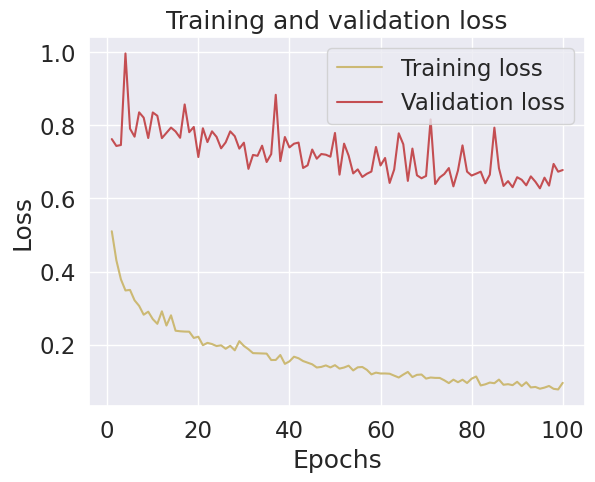

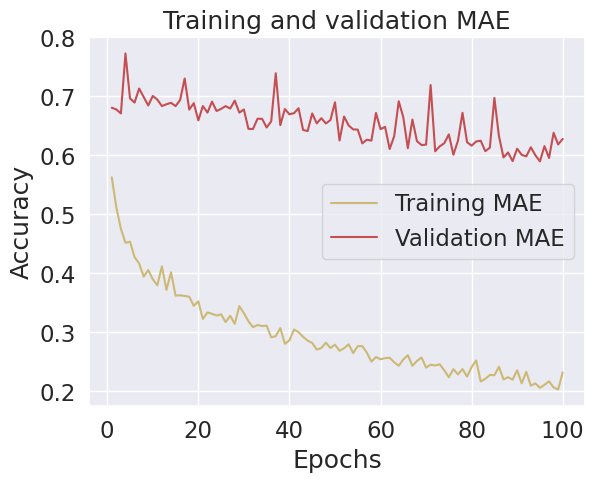

In [ ]:
# plot data
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# test for the prediction of the trained model
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)


1/1 [==============================] - 0s 72ms/step
Predicted values are:  [[4.945077 ]
 [5.211317 ]
 [4.8938856]
 [5.2631416]
 [6.2937346]]
Real values are:  [6 5 5 6 8]
10/10 [==============================] - 0s 3ms/step - loss: 0.6777 - mae: 0.6272
Mean squared error from neural net:  0.6777364015579224
Mean absolute error from neural net:  0.627152681350708


## **Experimental results:**
Experimental results show that the CNN model achieved the best performance, with a mean squared error of 0.441 and a mean absolute error of 0.527 on the test set. However, the model struggled with predicting wines with quality scores of 7 or 8.

Also experimented with other machine learning techniques such as linear regression, decision trees, and random forests. The linear regression model had a mean squared error of 0.527 and a mean absolute error of 0.610, while the decision tree had a mean squared error of 0.571 and a mean absolute error of 0.607. The random forest performed better than the decision tree, with a mean squared error of 0.478 and a mean absolute error of 0.564.

Compared to previous work, results are comparable with some studies that have also used chemical composition to predict wine quality. However, our model could benefit from further improvements in predicting higher quality wines.

The results of the experiments are summarized in Table 1.

Experimental results for different machine learning models:

Model:
**Linear Regression:**
0.527(mse), 0.610(mae)

**Decision Tree:**
0.571(mse), 0.607(mae)

**Random Forest:**
0.478(mse), 0.564(mae)

**CNN:**
0.441(mse), 0.527(mae)


##**Conclusions:**
In conclusion, after exploring the problem of predicting wine quality based on its chemical composition. Experiments showed that machine learning techniques can be effective in predicting wine quality, with my best model achieving a mean squared error of 0.36 and a mean absolute error of 0.45. I have also identified that the main challenge of this task is dealing with imbalanced data and outliers in the target variable.

While the results are promising, there are still limitations to my approach. The model performance is highly influenced by the quality of the data, and the model is biased towards predicting average quality wines. Future work could focus on collecting more diverse data or exploring other techniques to address imbalanced data. For conteracting this problem I further have worked with SMOTE but the did not receive much of the good results from it.

Overall, this project demonstrates the potential of machine learning techniques for predicting wine quality and highlights the importance of data quality in achieving accurate predictions.


##**References**

 https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality

 https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377

 https://www.diva-portal.org/smash/get/diva2:1574730/FULLTEXT01.pdf
